# Data Science CoderHouse 61690

### Alumno: Lucas Escobar



## Introducción

Evaluar el riesgo crediticio es crucial para las instituciones financieras, ya que les ayuda a prevenir pérdidas y tomar decisiones informadas. Este trabajo analiza datos transaccionales y demográficos de clientes, clasificándolos en "riesgosos" y "no riesgosos" para ciertos productos bancarios. El objetivo es desarrollar un modelo que permita identificar clientes de alto riesgo y optimizar las estrategias crediticias del banco.

## Descripción del Problema

El problema principal que enfrentan las entidades bancarias es identificar de manera precisa a los clientes con un alto riesgo de incumplimiento. Una evaluación inexacta puede resultar en pérdidas financieras significativas o, por el contrario, en la negación de crédito a clientes potencialmente valiosos. Dada la complejidad de los datos, se requiere un modelo que pueda procesar y analizar la información de manera efectiva para distinguir entre clientes "riesgosos" y "no riesgosos". El desafío consiste en utilizar características transaccionales y demográficas para construir un sistema de calificación que optimice la toma de decisiones crediticias del banco.

## Objetivo

El objetivo de este trabajo es desarrollar un modelo de clasificación que permita predecir de manera precisa el riesgo crediticio de los clientes del banco, utilizando datos transaccionales y demográficos. El modelo debe ser capaz de diferenciar entre clientes "riesgosos" y "no riesgosos", ayudando a la institución a gestionar mejor sus carteras crediticias y a tomar decisiones más informadas al momento de otorgar préstamos.
Buscando si hay alguna relacion entre alguna caracteristica del cliente y el riesgo.


## Fuente

Los datos utilizados para este análisis provienen del conjunto de datos titulado "Credit Risk Classification Dataset", disponible en la plataforma Kaggle https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset?resource=download&select=payment_data.csv . Este conjunto de datos contiene información transaccional y demográfica de clientes, incluyendo la clasificación de riesgo crediticio, y es adecuado para realizar estudios de predicción y segmentación del riesgo.

## Importación de Librerías y Carga de Datos

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import os
drive.mount('/content/gdrive')


df_p = pd.read_csv('/content/gdrive/My Drive/Data/payment_data.csv')
df_c = pd.read_csv('/content/gdrive/My Drive/Data/customer_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Exploración de Datos

En esta sección, se realiza la exploración de los datos para determinar la naturaleza, tipos de datos, usabilidad e identificar patrones.

El link posee dos archivos: payment_data y customer_data.

**HIPOTESIS**

- Analizar si en algunas fechas en especificas se dejaron de realizar los pagos.

- Si hay algun codigo de producto que tiene mas tendencia con alto riesgo.

- Clientes catalogados como alto riesgo tienen alguna caracteristica diferente que se les pueda relacionar?



In [98]:
df_p.info()
print('----------------------------------------------------')
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Cou

Payment tiene 8250 registros y 12 columnas, de las cuales algunas parece tener algunos valores non-null, las cuales habrán que revisar para ver el tratamiento a seguir.



Customer tiene 1125 registros y 13 columnas, al igual que el otro df tiene valores non-null a tratar.



Las variables update_date y report_date aparecen como tipo object, las cuales debemos transformar a tipo Date.

Explicación de las columnas:


**payment_data.csv:**
customer’s card payment history.

1.   id: customer id
2.   OVD_t1: number of times overdue type 1
3.   OVD_t2: number of times overdue type 2
4.   OVD_t3: number of times overdue type 3
5.   OVD_sum: total overdue days
6.   pay_normal: number of times normal payment
7.   prod_code: credit product code
8.   prod_limit: credit limit of product
9.   update_date: account update date
10.  new_balance: current balance of product
11.  highest_balance: highest balance in history
12.  report_date: date of recent payment

**customer_data.csv:**
customer’s demographic data and category attributes which have been encoded.

1.   Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.
2.   label is 1, the customer is in high credit risk
3.   label is 0, the customer is in low credit risk



In [99]:
df_p.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


- La media (mean) es mayor en el OVD_t3 (0,369212) que en el t2 y t1, lo cual significa que más han estado en mora-atraso en ese plazo mayor.

- La media de OVD_sum , que es la cantidad de días en mora, es de 187, pero con una desviación estandar de 1804. Lo que significa que hay clientes muy extremos en cantidad de días de mora (se visualiza siendo que el max es de 31500).

- La Media del nuevo Balance actual (new_balance) es de 105.404 con una desviación estandar de 1.887.704, a comparación a el balance más alto del mismo cliente en estos productos, su media ha sido de 219.202 y desviación estandar 2,814,536.


In [100]:
df_c.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


Son variables categóricas por lo cual no se pueden realizar operaciones matemáticas con sus valores.

In [101]:
df_p.isnull().sum()

,0
id,0
OVD_t1,0
OVD_t2,0
OVD_t3,0
OVD_sum,0
pay_normal,0
prod_code,0
prod_limit,6118
update_date,26
new_balance,0


El prod_limit no lo usaremos dado que no tiene relacion con la hipotesis que nos interesa plantear.

In [102]:
df_c.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,149
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


In [103]:
df_p.head(20)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN
7,54987756,0,0,0,0,2,1,NaN,02/12/2016,365331.6,304943.0,NaN
8,58988028,0,0,0,0,4,0,NaN,02/12/2016,16795.2,28500.0,19/04/2016
9,58993180,0,0,0,0,3,6,NaN,02/12/2016,26688.0,31300.0,20/03/2016


**Distribucion de El balance actual y del balance mas alto**

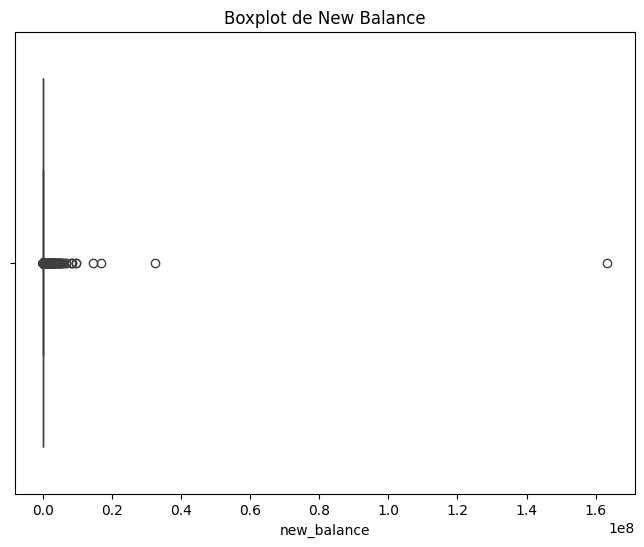

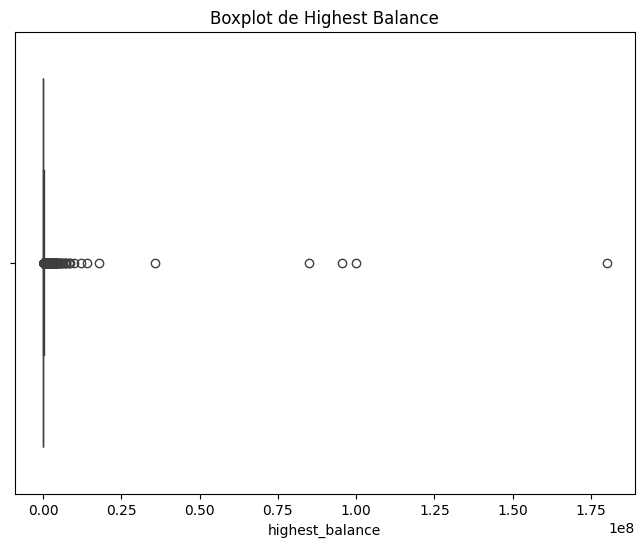

In [104]:
import seaborn as sns

# Creando boxplot para 'new_balance'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_p['new_balance'])
plt.title('Boxplot de New Balance')
plt.show()


# Creando boxplot para 'highest_balance'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_p['highest_balance'])
plt.title('Boxplot de Highest Balance')
plt.show()

- Podriamos limpiar los outliers que estan haciendo que nuestra media y y vision se vea distorsionada ya que el resto de valores se encuentran juntos.

**Ver la serie de tiempo de los ultimos pagos 'Report date'**

<ipython-input-105-6c7c3b21ac2c>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_p['report_date'] = pd.to_datetime(df_p['report_date'])


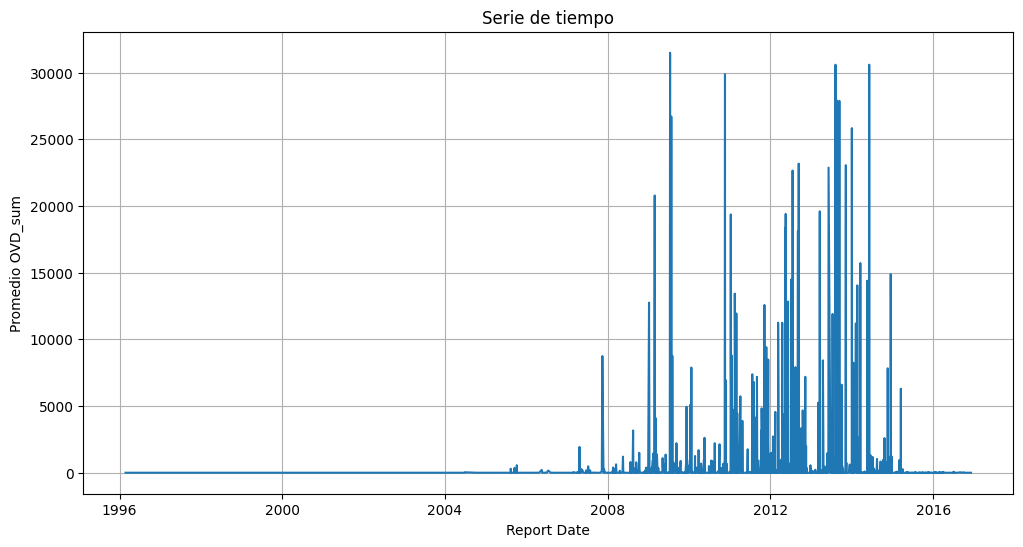

In [105]:
# Convertir 'report_date' a  tipo datetime
df_p['report_date'] = pd.to_datetime(df_p['report_date'])

# Agrupacion por report_date
df_grouped = df_p.groupby('report_date')['OVD_sum'].mean()


plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel('Report Date')
plt.ylabel('Promedio OVD_sum')
plt.title('Serie de tiempo')
plt.grid(True)
plt.show()

- Se pueden analizar las fechas, entre que años estuvieron la mayor cantidad de pagos.

**Ver los productos mas demandados**

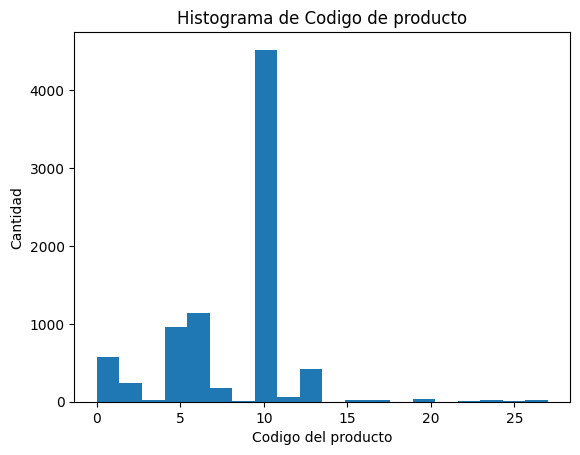

In [106]:
# Creamos un histograma usando la 'prod_code' columna
plt.hist(df_p['prod_code'], bins=20)

# Anadimos los titulos
plt.xlabel('Codigo del producto')
plt.ylabel('Cantidad')
plt.title('Histograma de Codigo de producto')

# Mostrar el grafico
plt.show()

- Se visualiza claramente que la Moda es el producto con codigo 10, siguiendo el producto 6 y 5.

In [107]:
df_c.head(20)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
6,1,59001917,4,1304.0,3,35000.0,2,8,9,85,5,60069,1.000000
7,1,54984789,5,1256.0,3,78000.0,2,15,-1,111,3,60030,1.000000
8,0,58984557,5,1323.5,3,218000.0,2,15,5,112,4,151300,282.842713
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496


**Encontrar como se encuentran distruibuidas las variables categoricas y demograficas segun si es bajo o alto riesgo**

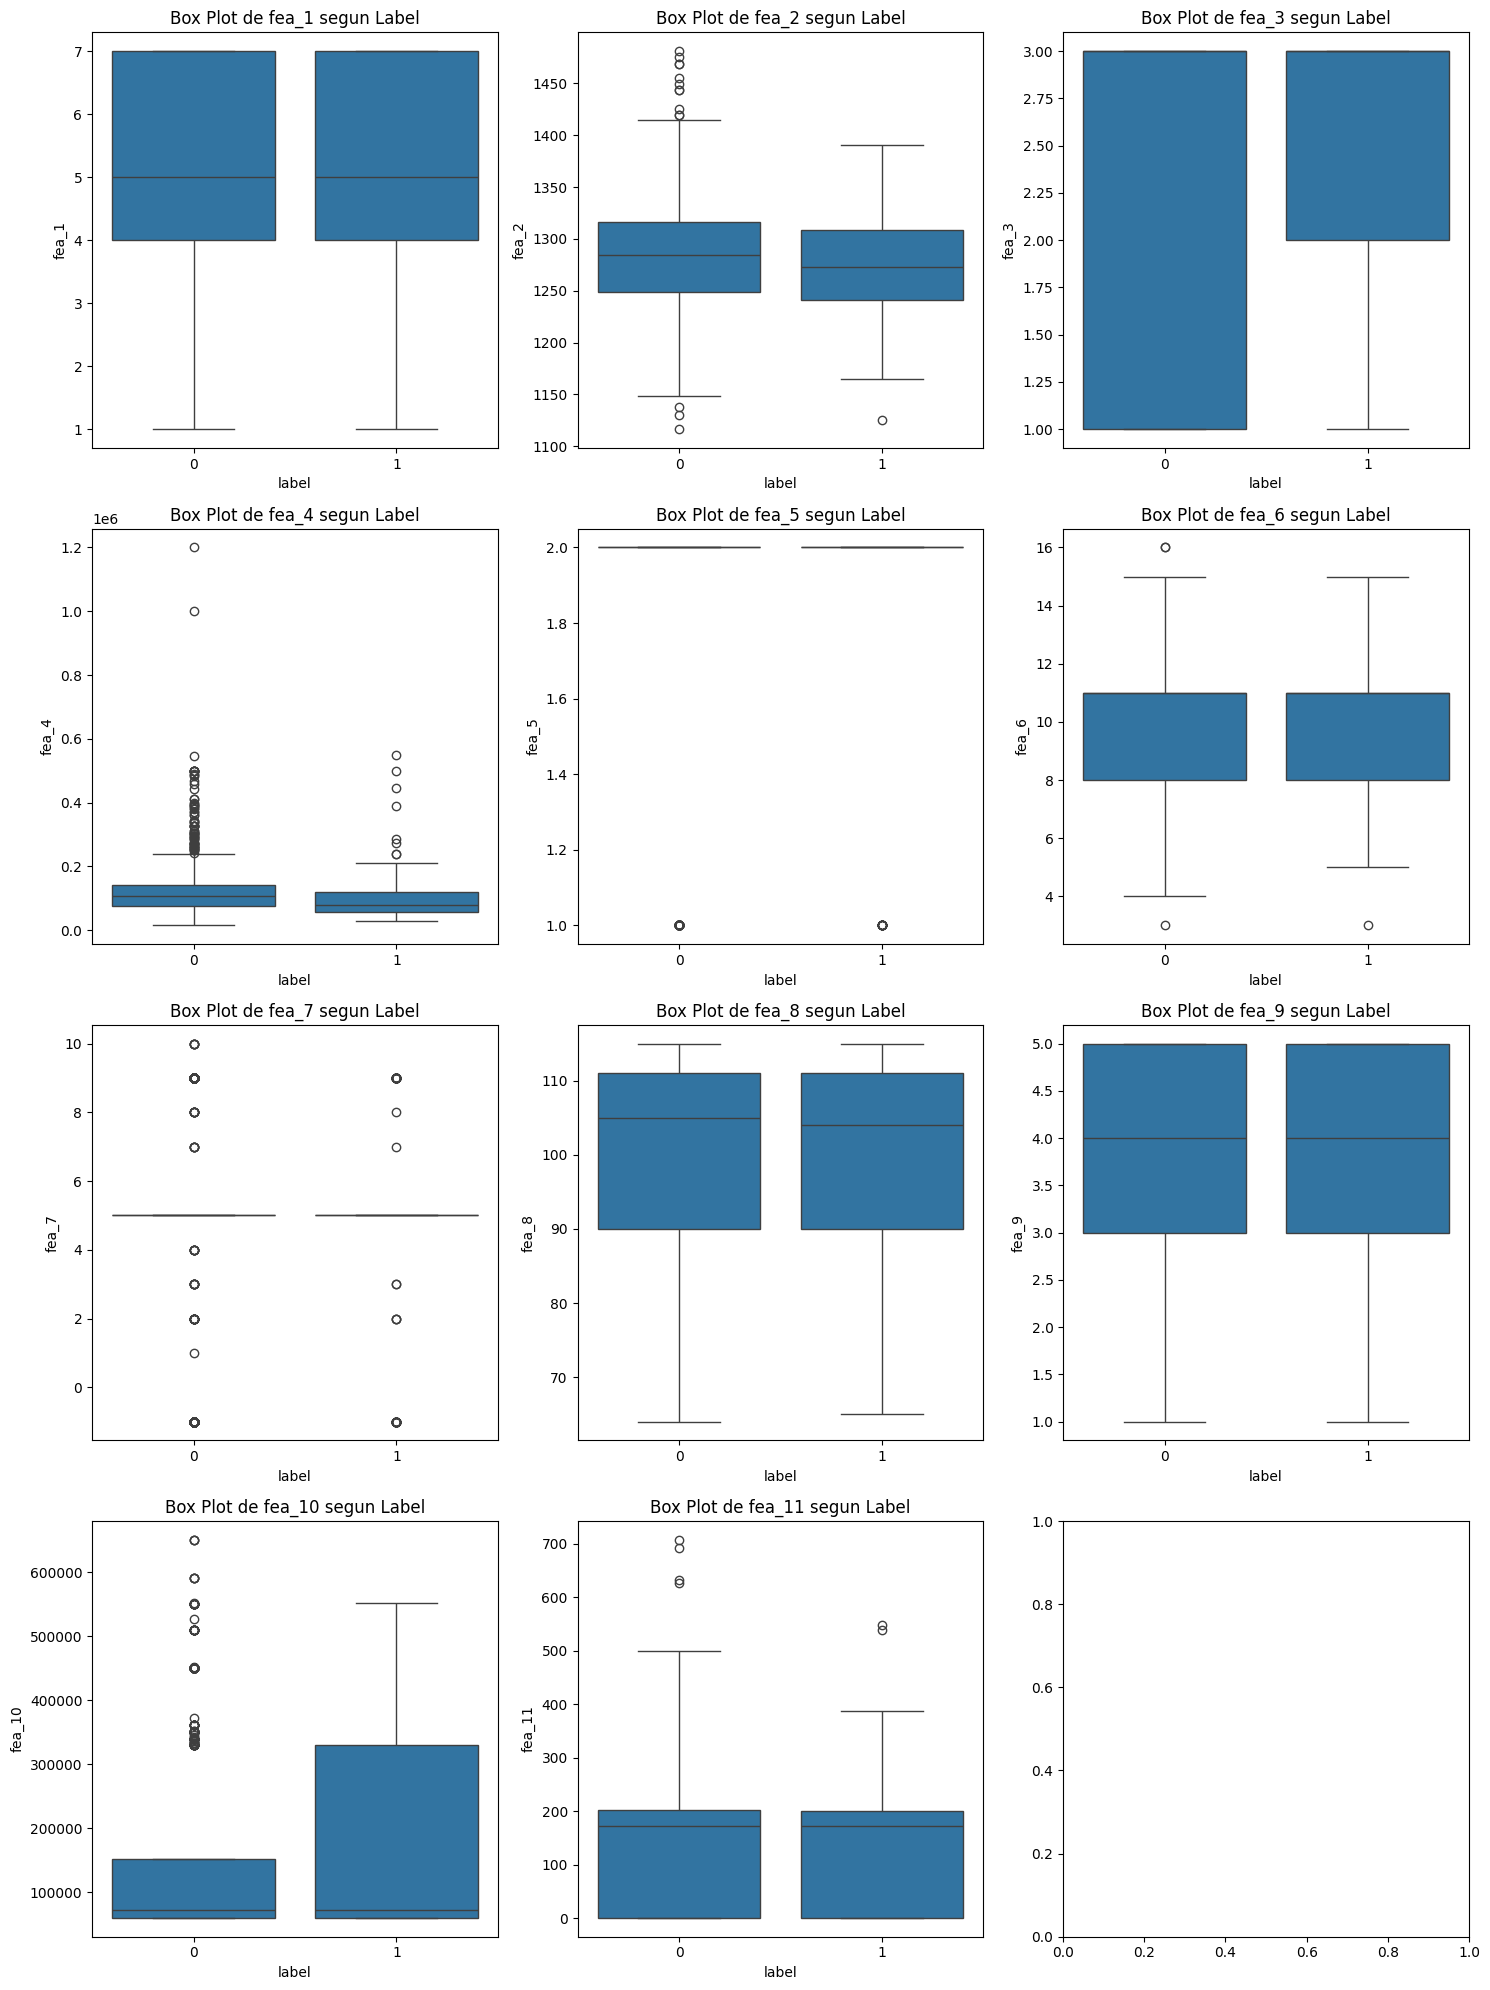

In [116]:
# Excluir las columnas Id y label
columns_to_plot = [col for col in df_c.columns if col not in ['id', 'label']]

# Crear una figura con subplots
rows = (len(columns_to_plot) + 2) // 3  # Calcular número de filas para 3 columnas
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# Iterar sobre las columnas y crear los boxplots en los subplots
for i, column in enumerate(columns_to_plot):
  row = i // 3
  col = i % 3
  sns.boxplot(x='label', y=column, data=df_c, ax=axes[row, col])
  axes[row, col].set_title(f'Box Plot de {column} segun Label')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura con todos los boxplots
plt.show()

- En fea_3 se visualiza que los clientes 1 (alto riesgo) mayormente varian de 2 a 3.
- fea_10 hay gran cantidad de outliers en la columna 0 (bajo riesgo).

**Analisis de los riesgos de los clientes**

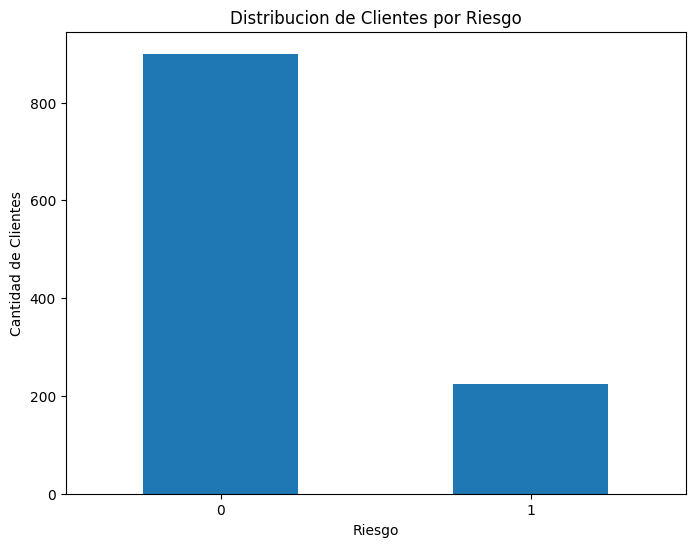

In [109]:
# Usando el dataframe 'df_c' con la columna 'label'
label_counts = df_c['label'].value_counts()

# Crear un bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Distribucion de Clientes por Riesgo')
plt.xlabel('Riesgo')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

Donde "0" es bajo riesgo y "1" son quienes tienen alto riesgo.

**Es importante conocer que tipo de productos estan identificados con los clientes que tienen alto riesgo y cuales menos riesgo**

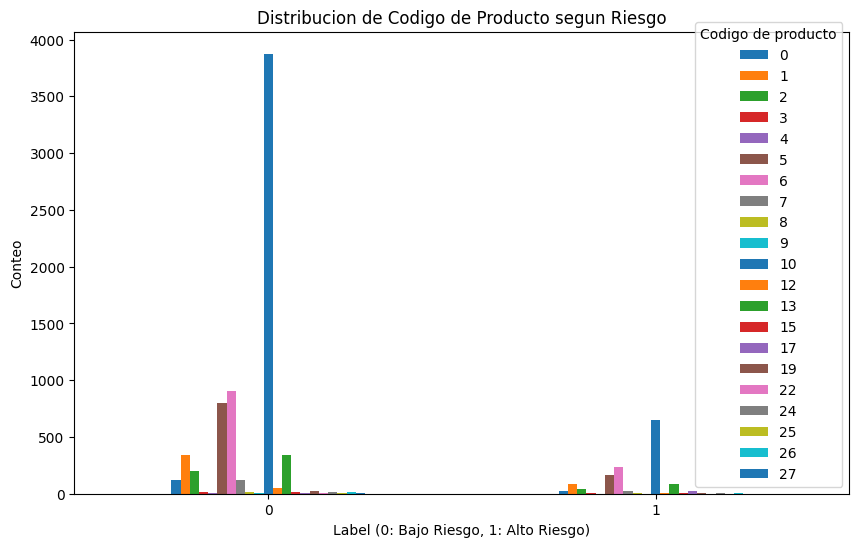

In [110]:
# Juntar los dos dataframes basados en la columna 'id'
merged_df = pd.merge(df_c, df_p, on='id', how='inner')

# Agrupar por label y product_code y contar el numero de frecuencias
grouped_df = merged_df.groupby(['label', 'prod_code'])['id'].count().unstack()

# realizar el grafico
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Distribucion de Codigo de Producto segun Riesgo')
plt.xlabel('Label (0: Bajo Riesgo, 1: Alto Riesgo)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.legend(title='Codigo de producto')
plt.show()

Se identifica una muy similar relacion entre los bajo riesgo y alto riesgo.

## Machine Learning

**Se realiza un modelo de Machine Learning para trabajar con la variable target 'Label' y detectar si un cliente es de bajo o de alto riesgo.**

Se prueba el Decision Tree Classifier:

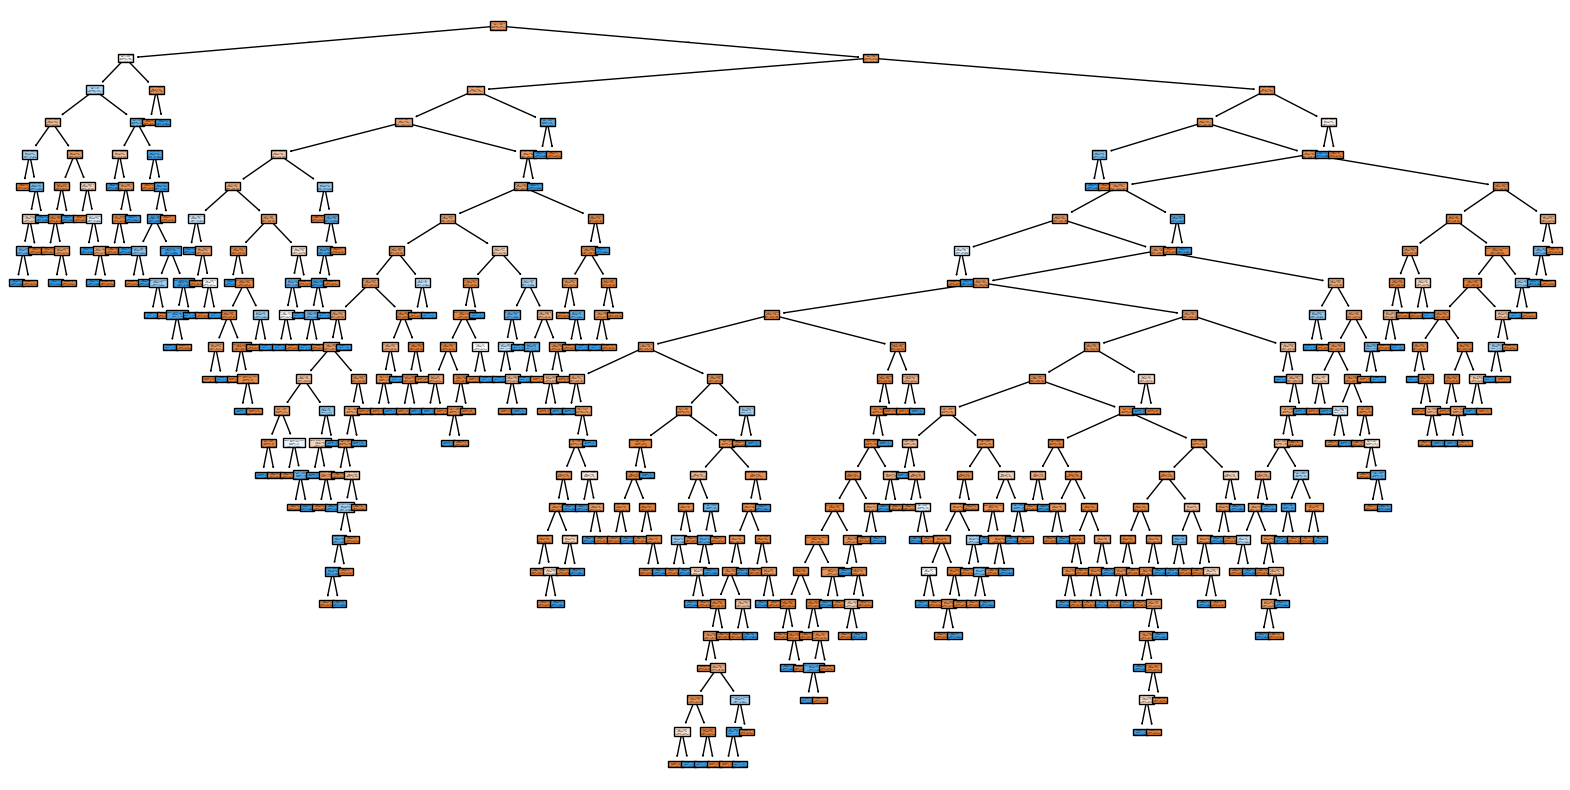

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Preparar los datos y eliminar columnas que no sirven para el modelo.
X = merged_df.drop(['label', 'update_date', 'report_date', 'prod_code', 'id'], axis=1)  # Eliminar la columna 'label', 'update_date', 'report_date', 'prod_code' y 'id'
y = merged_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo DecisionTreeClassifier
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Bajo Riesgo', 'Alto Riesgo'], filled=True)
plt.show()

In [112]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1384
           1       0.96      0.94      0.95       266

    accuracy                           0.98      1650
   macro avg       0.97      0.97      0.97      1650
weighted avg       0.98      0.98      0.98      1650

Precisión del modelo: 0.9842424242424243


*Este modelo tiene un accuracy del 98%, lo cual es un buen resultado*

Se define la funcion de Matriz de consufion:

In [113]:
from sklearn.metrics import confusion_matrix

def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    # No Normalizada
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels= ('Falso (P)', 'Verdadero (P)'),
                yticklabels = ('Falso', 'Verdadero'),
                annot=True, fmt='d',
                ax=ax[0],
                square=1, linewidth=1.);
    # Normalizada
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix,
                xticklabels= ('Falso (P)', 'Verdadero (P)'),
                yticklabels = ('Falso', 'Verdadero'),
                annot=True, fmt='.2%',
                ax=ax[1],
                square=1, linewidth=1.);
    plt.suptitle('Matriz de Confusión')
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Predicción')
    plt.show()

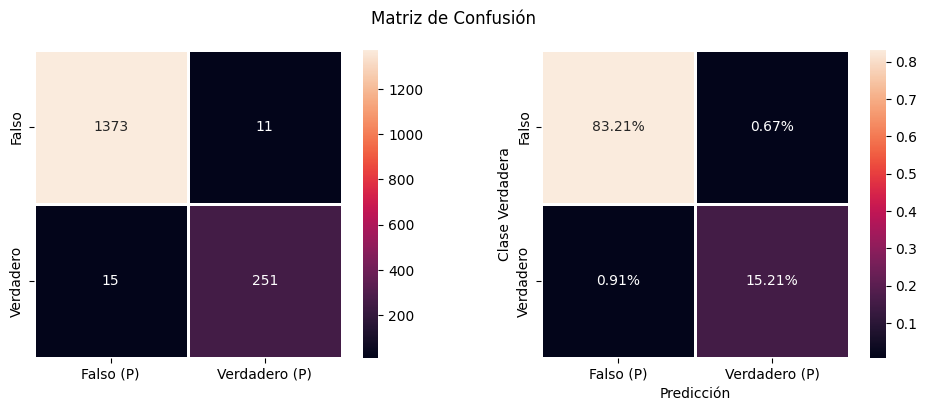

In [114]:
matriz_confusion(y_test, y_pred)

**Se prueba otro modelo de Machine Learning, el de Regression Logistic**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo: 0.8303030303030303
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1370
           1       0.50      0.01      0.01       280

    accuracy                           0.83      1650
   macro avg       0.67      0.50      0.46      1650
weighted avg       0.77      0.83      0.76      1650



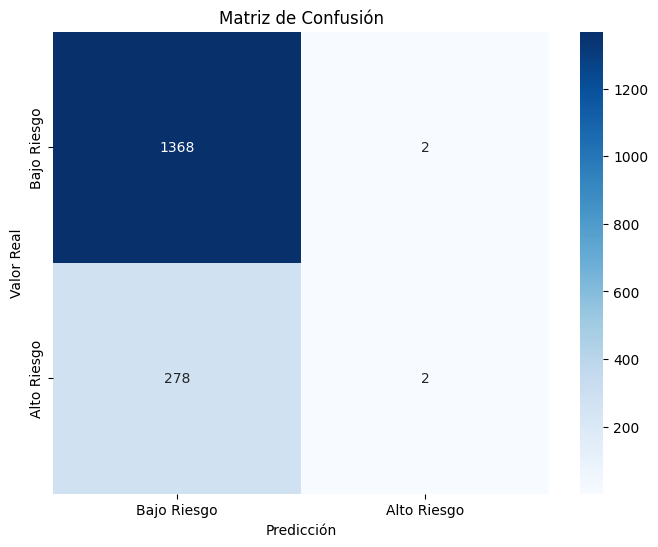

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reemplazar valores NaN por la moda de la columna
merged_df = merged_df.fillna(merged_df.mode().iloc[0])


# Preparar los datos y eliminar columnas que no sirvan al modelo.
X = merged_df.drop(['label', 'update_date', 'report_date', 'prod_code', 'id'], axis=1)
y = merged_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Crear un modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión con seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo Riesgo', 'Alto Riesgo'],
            yticklabels=['Bajo Riesgo', 'Alto Riesgo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

*En este modelo la precision es del 83%. Mucha cantidad de errores al precedecir como clientes de Bajo Riesgo y que en realidad eran de Alto Riesgo*